Qu’est-ce que la bibliothèque Pillow ?
Comment ouvrir et manipuler une image (couleur) avec Pillow ?
Comment modifier une image avec Pillow (rotation, découpage, floutage d’une zone particulière, dessin sur l’image) ?

# Pillow

Pillow est une bibliothèque de manipulation d'image en python, il s'agit d'un fork de PIL (Python Imaging Library). Un fork signifie qu'il s'agit de la copie d'un répertoire, ici le répertoire PIL, cela permet de tester des modifications dans le code sans pour autant modifier le projet d'origine. Ainsi Pillow est en quelque sorte le successeur de PIL et est disponible librement selon les termes de la Python Imaging Library license.

La bibliothèque Pillow permet l'ouverture, la manipulation et la sauvegarde d'images et supporte plusieurs format d'images (PNG, JPEG, GIF ...). Pillow fournit des capacité de traitement d'image assez puissante et permet ainsi les manipulations basiques comme avancée des images. Cette bibliothèque contient de nombreux modules et il serait trop long de tous les détailler, ainsi nous allons vous présenter les manipulations d'images les plus utiles pour un utilisateur lambda. 

Un premier point est que la bibliothèque Pillow utilise le principe d'image matricielle. Une image matricielle peut être représenté comme une "carte de points", chaque élement de la matrice un point avec couleur associée. Une image est donc formée d'un ensemble de point de couleurs contenu dans un tableau (matrice). Au sein de l'image matricielle les points de couleur sont des pixels (picture elements), le fait de juxtaposer ces points de couleurs permets une reproduction des moindres détails d'une image.

Le principe d'image matricielle s'oppose au principe d'image vectorielle. Une image vectorielle est composé d'éléments géométriques (droites, polygones ...)avec différentes caractéristique (forme, couleur ...). L'avantage principal d'une image vectorielle par rapport à une image matricielle est qu'elle est redimensionnable sans perte de qualité. Il existe de nombreux format de fichier vectorielle, PDF, Illustrator ...



## Ouverture d'un fichier image

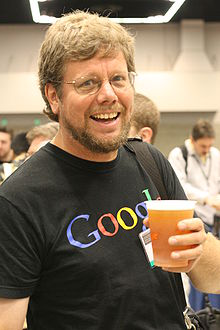

JPEG (220, 330) RGB


In [1]:
from PIL import Image, ImageFilter, ImageFont, ImageDraw, ImageEnhance # Importation de modules Pillow

guido = Image.open("guido2.jpg") # ouverture d'une image au format jpg

display(guido) # Affichage de l'image 
# Non utilisation de .show()

print(guido.format, guido.size, guido.mode) # Information sur une image

mg.save("discus.png", "PNG")

On constate que nous avons une taille

### Bande

Pillow repose également sur le principe de "bande d'image", les images sont composées d'une sucession de bandes. L'exemple classique est la bande RGBA, rouge, vert, bleu et transparent.

Une image peut être constitué d'une ou plusieur bande de données. Une image PNG peut avoir par exemple  les bandes "R" pour rouge, "G" pour vert, "B" pour bleu et "A" pour transparent. Il est possible d'agir sur chaque bande séparémment.

In [2]:
print(guido.getbands())

('R', 'G', 'B')


Nous pouvons voir ici que l'image est constituer de 3 bandes : rouge, vert et bleu.

Mode

Ensuie Pillow repose également sur le principe de modes, le mode d'une image représentes le types et la profondeur d'un pixel. Un pixel utilise la totalité de la profondeur d'un bit. Par exemple un pixel de 8 bits à une profondeur de 0 - 255 (car 2^8 = 256). La bibliothèque Pillow prend en charge de nombreux modes dont 2 bien connus :

RGB(Pixels 3x8 bits, couleurs vraies) 
RGBA(Pixels 4x8 bits, couleurs vraies avec masque de transparence)

In [3]:
print(guido.mode)

RGB


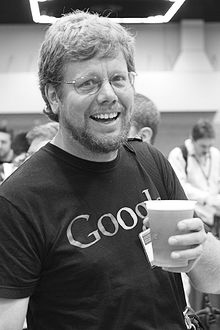

In [9]:
gris = guido.convert("L")
display(gris)

## Manipulations d'images

### Rotation géométrique simple

Nous allons afficher les canaux rouge, vert et bleu de notre image.

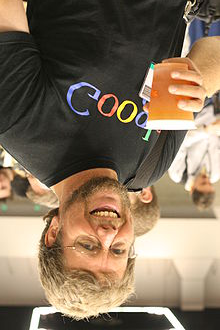

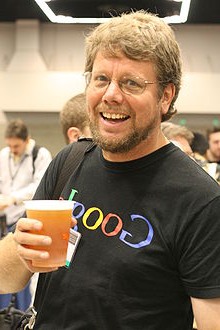

In [7]:
rotation1 = guido.transpose(Image.FLIP_TOP_BOTTOM)
rotation2 = guido.transpose(Image.FLIP_LEFT_RIGHT)
display(rotation1, rotation2)

Pillow permet de directement modifier une image. Nous allons voir comment faire une rotation, un découpage, un floutage d’une zone particulière et un dessin sur l’image grâce à la bibliothèque Pillow.

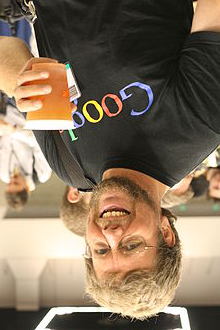

In [50]:
rotation2 = guido.rotate(180)
display(rotation2)

Découpage

(220, 330)


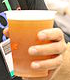

In [43]:
print(guido.size)

recadrer = guido.crop((140, 190, 210, 270))

display(recadrer)

Floutage d'une zone particulière

1 Image original
2 Découpage de l'image
3 Flouter la partie découper
4 coller l'image découpé dans l'image original

comment trouver facilement les coordonnées dans l'image

Attention à ce que l'image retourne bien à son emplacement initial == reprendre les coordonées de recadrage

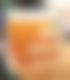

In [46]:
flou = recadrer.filter(ImageFilter.GaussianBlur(5))

display(flou)

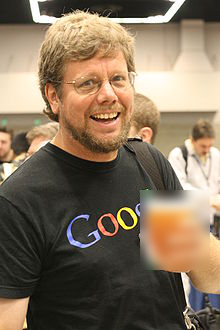

In [47]:
guido.paste(flou, (140, 190, 210, 270))

display(guido)

Dessin sur une image

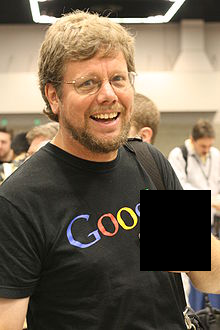

In [59]:
guido = Image.open("guido2.jpg")

dessin = ImageDraw.Draw(guido)
dessin.rectangle((140, 190, 210, 270), fill="black")

display(guido)

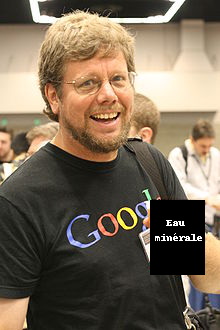

In [106]:
guido = Image.open("guido2.jpg")

insert = Image.new('RGBA', (55,75), "black")
dessin = ImageDraw.Draw(insert)
dessin.text((5, 17), "  Eau\nminérale")
guido.paste(insert, (150, 200))

display(guido)